In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
mystation = 'Frankfurt_Stadt'

In [3]:
df = pd.read_csv(f'../data/ECA_blended_{mystation}/data.csv')

In [4]:
df.shape[0] / 365.25

151.4113620807666

In [5]:
df

,SOUID,DATE,TG,Q_TG
0,122376,18700101,-24,0
1,122376,18700102,26,0
2,122376,18700103,25,0
3,122376,18700104,26,0
4,122376,18700105,12,0
...,...,...,...,...
55298,122364,20210527,107,0
55299,122364,20210528,140,0
55300,122364,20210529,149,0
55301,122364,20210530,156,0


In [6]:
df.columns = [name.strip() for name in df.columns]

In [7]:
df['date'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

In [8]:
df['year'] = df['date'].dt.year

In [9]:
df.replace(-9999, np.nan, inplace=True)

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df = df.groupby(['year'])[['TG']].mean().reset_index()

In [12]:
df.drop(df.tail(1).index,inplace=True)

In [13]:
df.TG = df.TG / 10

In [14]:
df

,year,TG
0,1870,8.978297
1,1871,8.204110
2,1872,10.742896
3,1873,10.451781
4,1874,9.837534
...,...,...
146,2016,11.569126
147,2017,11.815616
148,2018,12.943836
149,2019,12.337808


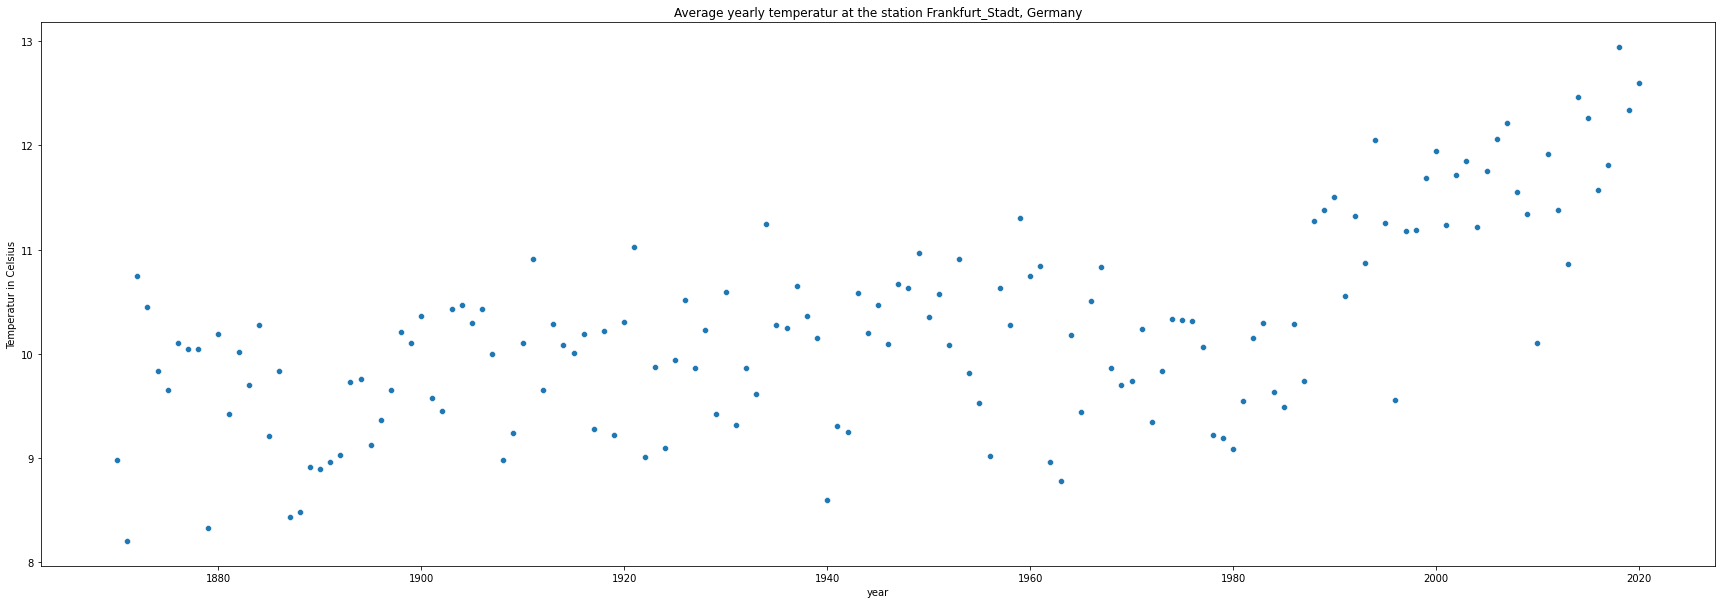

In [15]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=df.year, y=df.TG)
plt.title(f'Average yearly temperatur at the station {mystation}, Germany')
plt.ylabel('Temperatur in Celsius')
plt.show()

In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [17]:
pf = PolynomialFeatures(degree=2, include_bias=False)

In [18]:
polytransformer = make_column_transformer(
    (pf, ['year'])
)

In [19]:
dfpoly = polytransformer.fit_transform(df)

In [20]:
mp = LinearRegression()

In [21]:
mp.fit(dfpoly, df.TG)

LinearRegression()

In [22]:
df['predict'] = mp.predict(dfpoly)

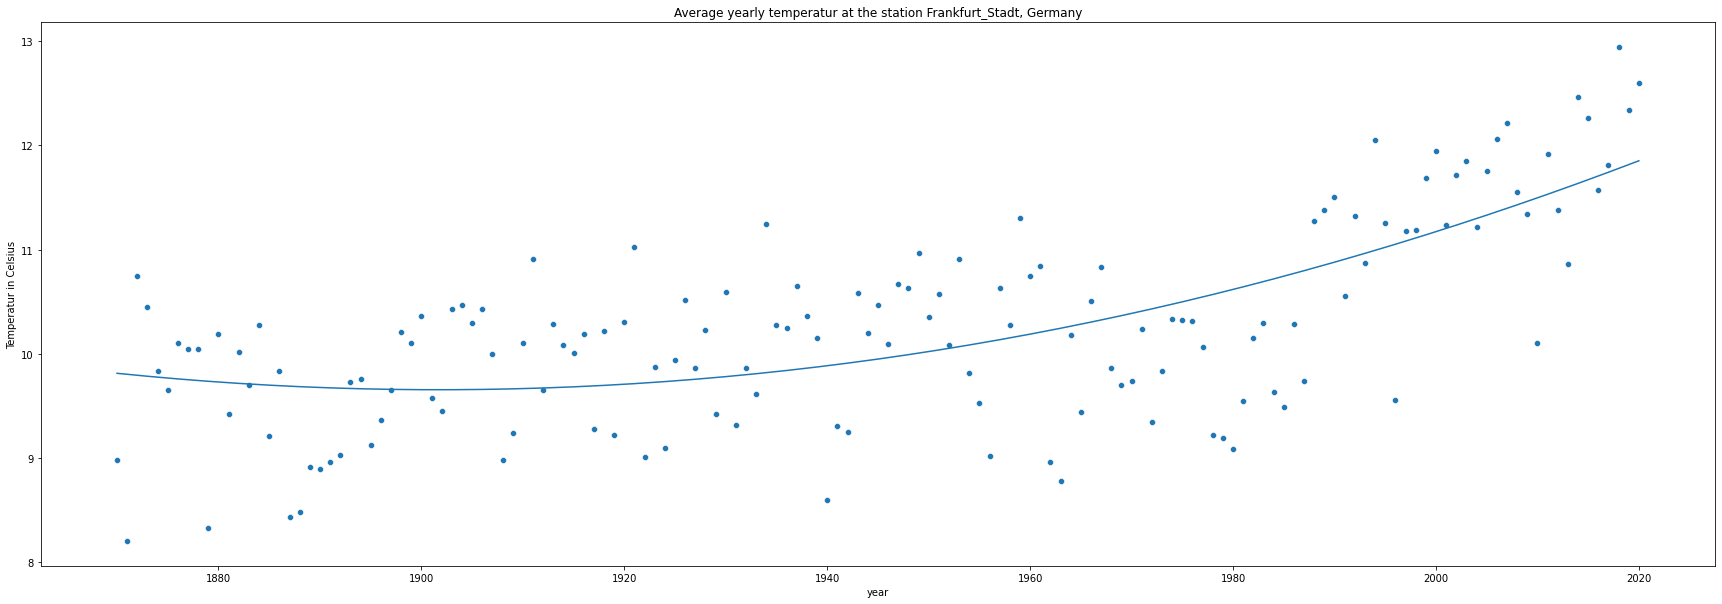

In [23]:
plt.figure(figsize=(30,10))
sns.scatterplot(x=df.year, y=df.TG)
sns.lineplot(x=df.year, y=df.predict)
plt.title(f'Average yearly temperatur at the station {mystation}, Germany')
plt.ylabel('Temperatur in Celsius')
plt.show()